# Cek Spam atau Scam Chat Indonesia
Proses mengecek sebuah chat adalah spam atau bukan menggunakan metode **KNN** dengan model data berasal dari kaggle *GEVABRIEL | Data Set **Indonesia SMS Spam*** yang telah ditambahkan beberapa data tambahan dan diubah menjadi file excel

In [1]:
# Menambahkan Libary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Membaca model data
data = pd.read_excel("Model/model_pesan.xlsx")
data.head()

,pesan,kategori
0,Terimakasih rekan semua utk yg hadir. Bukti ke...,ham
1,PESAN RESMI dari\nPT.M-KIOS\nAnda mendapatkan ...,spam
2,Anda terdaftar sbgai pemenang LAZADA M-dptkan\...,spam
3,ada gua denger,ham
4,NASABAH Yth.\nDiminta ke KANTOR karna REKENING...,spam


## Filter Data
Pada model data yang digunakan terdapat 2 kategori untuk pesan, yaitu **spam** dan **ham**. Untuk mempermudah proses pembuatan program kedua nilai tersebut diubah menjadi **1 untuk *spam*** dan **0 untuk *ham***.

In [2]:
data['kategori'] = data['kategori'].map({'spam':1, 'ham':0})
data.head()

,pesan,kategori
0,Terimakasih rekan semua utk yg hadir. Bukti ke...,0
1,PESAN RESMI dari\nPT.M-KIOS\nAnda mendapatkan ...,1
2,Anda terdaftar sbgai pemenang LAZADA M-dptkan\...,1
3,ada gua denger,0
4,NASABAH Yth.\nDiminta ke KANTOR karna REKENING...,1


>Kemudian lakukan pengecekan terhadap variable pesan dan kategori tidak ada nilai variable yang NULL untuk mempermudah proses pengolahan data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pesan     1157 non-null   object
 1   kategori  1157 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.2+ KB


## Pengolahan Data
Untuk melakukan proses pengolah data variable pesan diubah menjadi nilai matrix dari dari panjang pesannya. Kemudian data model yang dimiliki tersebut dibagi menjadi 2 model sebagai **train** dan **test**.
>Model untuk test hanya menggunakan 20% dari jumlah total model pesan yang dimiliki

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['pesan'])
y = data['kategori']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Analisis Akurasi nilai-K
Lakukan pengujian untuk nilai K dengan score terbaik untuk digunakan pada model KNN nantinya menggunakan model data train. 
>Pada percobaan ini menggunkan nilai K dari 1 sampai 25

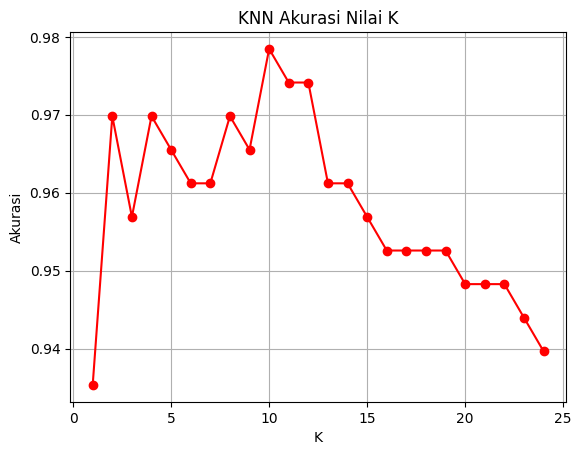

Optimal K: 10 & Max Accuracy : 0.978


In [5]:
# Set nilai K uji dan list untuk simpan scores
K = np.arange(1,25)
scores = []

for k in K:
    model_check = KNeighborsClassifier(n_neighbors=k)
    model_check.fit(X_train,y_train)
    score = model_check.score(X_test,y_test)
    scores.append(score)

# Plot akurasi untuk cek nilai K
plt.plot(K, scores, marker='o', color='red')
plt.title("KNN Akurasi Nilai K")
plt.xlabel("K")
plt.ylabel("Akurasi")
plt.grid(True)
plt.show()

# Menemukan nilai K optimal
optimal_k = K[np.argmax(scores)]
max_accuracy = max(scores)

print(f"Optimal K: {optimal_k} & Max Accuracy : {max_accuracy:.3f}")

### Pengujian Model
Melakukan proses pengujian menggunakan model test. Kemudian, membandingkan hasil dari prediksi tersebut dengan nilai sebenarnya pada model test. 
>Untuk melihat hasil perbandingan tersebut menggunakan *grafik confusion matrix*

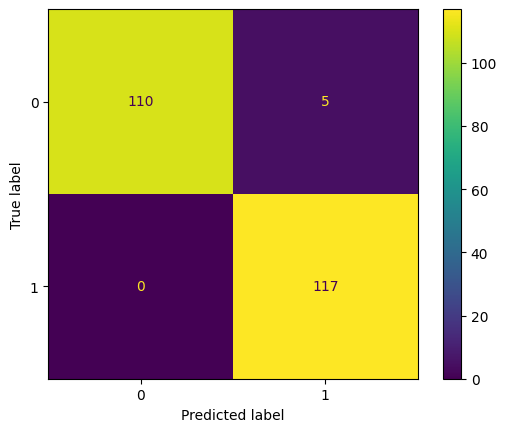

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       115
           1       0.96      1.00      0.98       117

    accuracy                           0.98       232
   macro avg       0.98      0.98      0.98       232
weighted avg       0.98      0.98      0.98       232



In [6]:
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Membuat grafik confusion matrix
cm =confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Membuat report hasil prediksi
print(classification_report(y_test,y_pred))

## Percobaan
Berdasarkan hasil pengujian yang dirasa sudah cukup, maka dapat langsung dilakukan proses pengujian dengan melakukan inputan langsung.

In [14]:
# Minta input dari pengguna
new_chat = input("Masukkan pesan: \n")
print(f"Isi Pesan :\n{new_chat}")

# Ubah pesan menjadi vektor fitur
new_chat = vectorizer.transform([new_chat])

# Prediksi label pesan
pred = model.predict(new_chat)

# Cetak hasil prediksi
if pred == 0:
    print("Ini Bukan SPAM")
else:
    print("Ini kemungkinan adalah Pesan SCAM termasuk SPAM")

Isi Pesan :
Ga tahu ah mau kirim pesan apa
Ini Bukan SPAM
